## 2 dimensional Schroedinger's equation solutions

In [188]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import eigsh

import matplotlib.pyplot as plt
from matplotlib import animation

In [189]:
# spatial grids
npoints = 200
xmin, xmax = -1, 1
ymin, ymax = -1, 1
X, Y = np.meshgrid(np.linspace(xmin,xmax, npoints), np.linspace(ymin,ymax, npoints))
dx = 2/npoints
dy = 2/npoints

In [196]:
Rbenchmark = 0.1
Vbenchmark = 1e1
mass = 1

def V_circular_well(x, y, V0=Vbenchmark, R=Rbenchmark):
    return np.where( np.sqrt(x**2 + y**2) < R, V0, 0)

def V_wall(x, y, V0=Vbenchmark, R=Rbenchmark):
    return np.where(x>0, V0, 0)


In [197]:
def solve_Hamiltonian(V, n_levels=30, **kwargs):
    diag = np.ones([npoints])
    diags = np.array([diag, -2*diag, diag])
    D = sparse.spdiags(diags, np.array([-1,0,1]), npoints, npoints)
    T = -mass/2 * sparse.kronsum(D,D)
    U = sparse.diags(V(X,Y, **kwargs).reshape(npoints**2), (0))
    H = T + U

    en, psi = eigsh(H, k=n_levels, which='SM')
    
    # NOTE: CHECK THIS! Is this transpose + reshaping operation swapping the x and y axes?
    psi = psi.T.reshape(([n_levels, npoints, npoints])) 
    inds = np.argsort(en)
    en = en[inds]
    psi = psi[inds]

    return en, psi

In [198]:
E_circ_p, psi_circ_p = solve_Hamiltonian(V_circular_well, R=0.1, V0=1e-8)
E_circ_m, psi_circ_m = solve_Hamiltonian(V_circular_well, R=0.1, V0=-1e-8)

In [199]:
E_wall_p, psi_wall_p = solve_Hamiltonian(V_wall, R=0.1, V0=1e-8)
E_wall_m, psi_wall_m = solve_Hamiltonian(V_wall, R=0.1, V0=-1e-8)

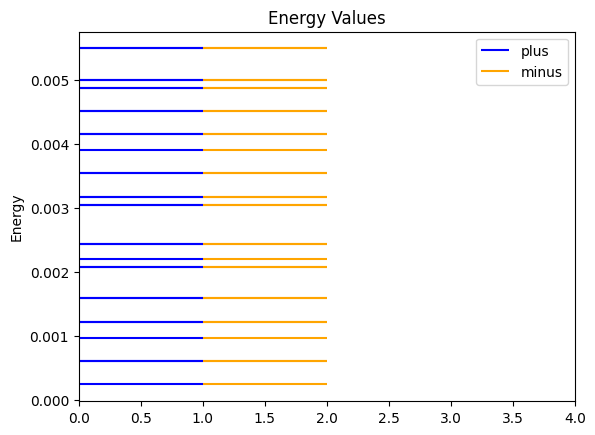

In [200]:
fig, ax = plt.subplots()

ax.hlines(E_circ_p, 0, 1, colors='blue', label='plus')
ax.hlines(E_circ_m, 1, 2, colors='orange', label='minus')

ax.legend()
ax.set_xlim(0, 4)
ax.set_ylabel('Energy')
ax.set_xlabel('')
ax.set_title('Energy Values')
fig.savefig('plots/energy_levels.png', dpi=300)

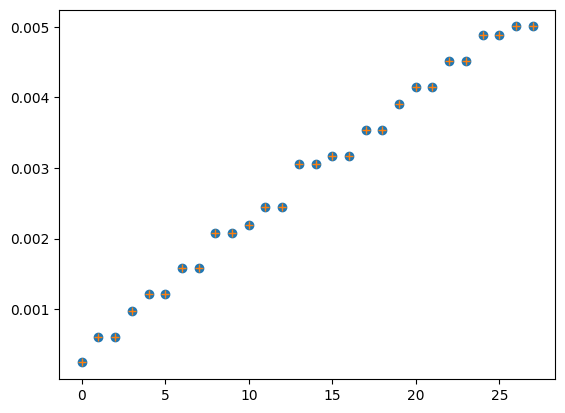

In [204]:
plt.plot(E_circ_p[:-2], 'o', label='Circular')
plt.plot(E_wall_p[:-2], '+', label='Wall')

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_15316/468155977.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax.contour(X, Y, psi_circ_m[i]**2, levels=20, linewidth=0.5)
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_15316/468155977.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth', 'linestyle'
  cs = ax.contour(X, Y, psi_wall_m[i]**2, levels=20, linewidth=0.5, linestyle='dashed')


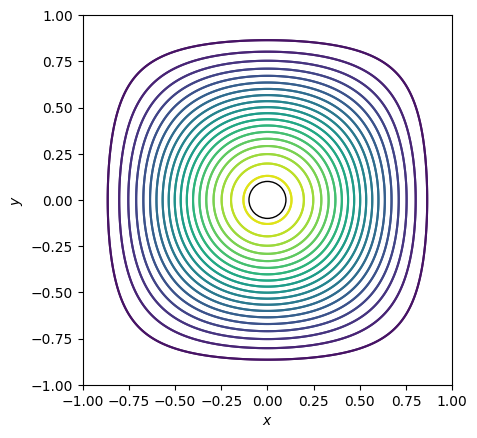

In [207]:
from matplotlib.patches import Circle

fig = plt.figure()
ax = plt.axes()

circle = Circle((0, 0), Rbenchmark, edgecolor='black', linewidth=1, fill=False, zorder=10)
ax.add_patch(circle)

i=0
# Asy =  (np.abs(psi_circ)**2 - np.abs(psi_circ_m)**2) / ( np.abs(psi_circ)**2 + np.abs(psi_circ_m)**2)
cs = ax.contour(X, Y, psi_circ_m[i]**2, levels=20, linewidth=0.5)
cs = ax.contour(X, Y, psi_wall_m[i]**2, levels=20, linewidth=0.5, linestyle='dashed')
# ax.clabel(cs, inline=True, fontsize=8)

# Plot the surface
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

# ax.set_xlim(-0.2,0.2)
# ax.set_ylim(-0.2,0.2)

fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_15316/369733971.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  _ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)


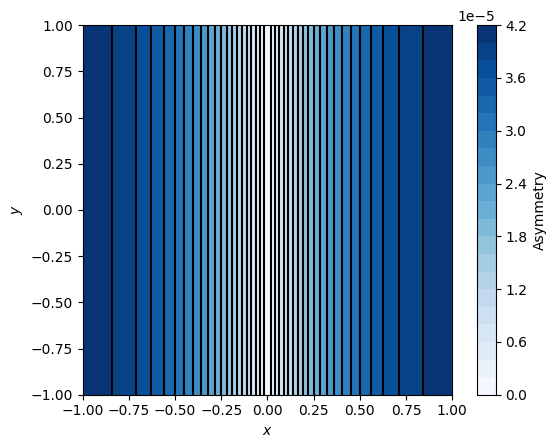

In [239]:
from matplotlib.patches import Circle

fig = plt.figure()
ax = plt.axes()

Asy =  np.abs((np.abs(psi_wall_p)**2 - np.abs(psi_wall_m)**2) / ( np.abs(psi_wall_p)**2 + np.abs(psi_wall_m)**2))
_ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)
cs = ax.contourf(X, Y, Asy[0], levels=20, cmap='Blues')
cbar = fig.colorbar(cs)

# Plot the surface
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
cbar.set_label('Asymmetry')
ax.set_aspect(r'equal')

# ax.set_xlim(-0.2,0.2)
# ax.set_ylim(-0.2,0.2)

fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')

In [ ]:
from matplotlib.patches import Circle

fig = plt.figure()
ax = plt.axes()

Asy =  np.abs((np.abs(psi_wall_p)**2 - np.abs(psi_wall_m)**2) / ( np.abs(psi_wall_p)**2 + np.abs(psi_wall_m)**2))
_ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)
cs = ax.contourf(X, Y, Asy[0], levels=20, cmap='Blues')
cbar = fig.colorbar(cs)

# Plot the surface
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')

In [227]:
np.shape(X)

(200, 200)

Text(0.5, 1.0, 'Asymmetry at y = 0')

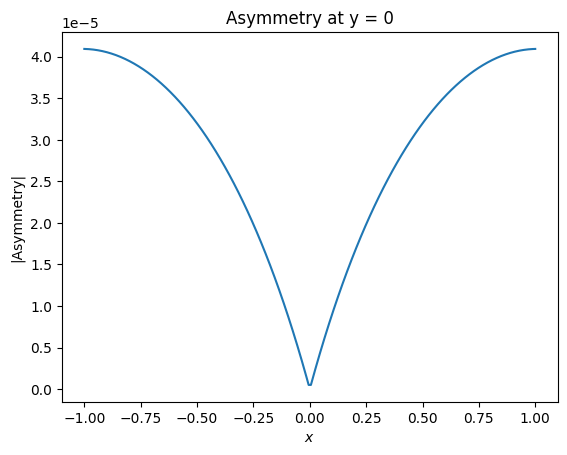

In [240]:
plt.plot(X[99,:], Asy[0,99,:], label='Wall')
plt.xlabel(r'$x$')
plt.ylabel(r'|Asymmetry|')
plt.title(f'Asymmetry at y = 0')

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_15316/3108437284.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  _ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)


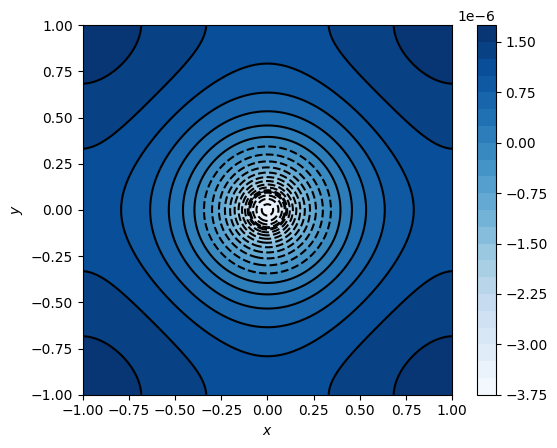

In [223]:
from matplotlib.patches import Circle

fig = plt.figure()
ax = plt.axes()

circle = Circle((0, 0), Rbenchmark, edgecolor='black', linewidth=1, fill=False, zorder=10)
ax.add_patch(circle)

Asy =  (np.abs(psi_circ_p)**2 - np.abs(psi_circ_m)**2) / ( np.abs(psi_circ_p)**2 + np.abs(psi_circ_m)**2)
_ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)
cs = ax.contourf(X, Y, Asy[0], levels=20, cmap='Blues')
cbar = fig.colorbar(cs)

# Plot the surface
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

# ax.set_xlim(-0.2,0.2)
# ax.set_ylim(-0.2,0.2)

fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')